# Adam Ruby - HiPy Nov 1st Registration Competition

Firstly, import modules: 
- csv to upload the file. 
- numpy for array manipulation.
- pandas for dataframe and plot creation.

and allow viewing of the plots.

In [1]:
%matplotlib inline

import csv
import numpy as np
import pandas as pd

Module CSV is used to import the registration data as a list

In [2]:
with open('registration_data.csv', newline='') as f:
    reg_csv = csv.reader(f, delimiter=',', skipinitialspace=True)
    
    reg_list = [line for line in reg_csv]

Inital list includes headings in first row. For just the data the first row is excluded.

In [12]:
reg_list = reg_list[1:]
reg_list[:5]  #To view first five rows as example

[['Management School', 'Other'],
 ['Other', 'Other'],
 ['Biology', 'Email'],
 ['Biology', 'Email'],
 ['Biology', 'Email']]

Lists are made for the variable names in order for it to be possible to count how people found out about HiPy and from what department.
- dep_list: List of department names
- found_list: List of ways people found out about HiPy

In [13]:
dep_list = ['Architecture','Astrophysics','Biology','Chemistry','Computer Science','EEE','Earth, Ocean, Ecology','External',
            'Institute of Infection /  Global Health','Management School','Mathematics','Other','Physics','Stephenson Institute']
found_list = ['Email','Other','Poster/Flyer','UoL video screen','Word of mouth']

Initalised count to zero, this will represent the number of people from each department.
pop_list is a list used to store the values of count.

In [5]:
count = 0
pop_list = np.empty([len(dep_list),len(found_list)])

Loop is made so that for each cell containing a certain way of finding out about HiPy (eg 'Email'), the number of people who found out that particular way from each particular department is counted correctly.

The names of the variables are iterated through using the lists dep_list and found_list.

In [7]:
for i in range(0,len(dep_list)):
    for j in range(0,len(found_list)):
        count = 0
        for k in range(0,len(reg_list)):
            if reg_list[k][0] == dep_list[i]:
                if reg_list[k][1] == found_list[j]:
                    count = count + 1
        pop_list[i][j] = count

dep_list variable 'Institute of Infection /  Global Health' updated to just 'Global Health' in order to make the graph
look better.

A pandas data frame is also created which shows the number of attendees from each department based on how they found out about HiPy.

In [8]:
dep_list[8] =  'Global Health'

df = pd.DataFrame(pop_list, columns=found_list, index=dep_list)
df

,Email,Other,Poster/Flyer,UoL video screen,Word of mouth
Architecture,1.0,0.0,0.0,0.0,0.0
Astrophysics,1.0,0.0,0.0,0.0,0.0
Biology,12.0,2.0,1.0,1.0,1.0
Chemistry,2.0,0.0,0.0,0.0,1.0
Computer Science,1.0,0.0,0.0,0.0,1.0
EEE,0.0,1.0,0.0,0.0,0.0
"Earth, Ocean, Ecology",1.0,0.0,1.0,0.0,0.0
External,2.0,0.0,0.0,0.0,1.0
Global Health,1.0,0.0,0.0,0.0,0.0
Management School,0.0,2.0,0.0,0.0,1.0


A horizontal bar chat with stacked colours using Pandas is created and labels/title set.

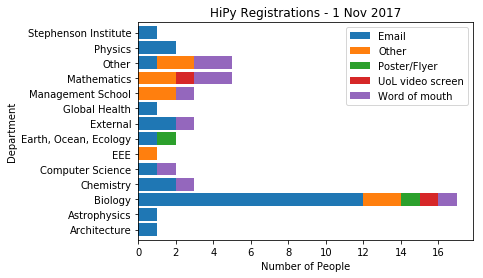

In [9]:
graph = df.plot.barh(stacked=True, title='HiPy Registrations - 1 Nov 2017', width=0.85)
graph.set_xlabel("Number of People")
graph.set_ylabel("Department")